<a href="https://colab.research.google.com/github/IntroComputationalPhysics-UNT/pivot-point-driven-pendulum-henry8675309/blob/main/Stability6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# The Pivot-Driven Pendulum Workflow


## 1. Physics Derivation (EOM)

**Goal:** Derive the Equation of Motion (EOM) for $\ddot{\theta}$ using the Lagrangian method ($L = T - V$).

**Coordinates:**
* **Pivot:**
    $$x_p(t) = -l \sin(\omega_d t)$$
    $$y_p(t) = l (\cos(\omega_d t) - 1)$$

* **Bob:**
    $$x_b(t) = x_p(t) + l \sin(\theta)$$
    $$y_b(t) = y_p(t) - l \cos(\theta)$$

**Velocities:**
$$\dot{x}_b = \dot{x}_p + l \dot{\theta} \cos(\theta)$$
$$\dot{y}_b = \dot{y}_p + l \dot{\theta} \sin(\theta)$$

**Lagrangian:**
$$T = \frac{1}{2}m(\dot{x}_b^2 + \dot{y}_b^2)$$
$$V = mgy_b$$

**Solve:**
$$\frac{d}{dt}\left(\frac{\partial L}{\partial \dot{\theta}}\right) - \frac{\partial L}{\partial \theta} = 0 \implies \ddot{\theta} = f(t, \theta, \dot{\theta}, \omega_d)$$

## 2. Code Implementation

  * Import `numpy`, `matplotlib.pyplot`, `solve_ivp`, `FuncAnimation`, and `HTML`.

  * Define `pendulum_ode(t, y, ...)`: Implements the EOM for $\ddot{\theta}$ from Part 1.

  * Define `get_pivot_xy(t, ...)`: Implements the corrected pivot equations from the homework image.

  * Define `get_pendulum_xy(theta, l)`: Calculates bob's position relative to pivot.

  * Define `get_lab_xy(...)`: Calculates bob's position in the lab frame.

  * Copy `create_pendulum_animation(...)` from the `README.md` file.

## 3. Simulation & Visualization

  * **1. Set Parameters:** `l`, `g`, `omega_d`.

  * **2. Set Initial Conditions:** $\theta_0=0$ and $\dot{\theta}_0=0$.

  * **3. Set Time:** `t_plot = np.linspace(0, 30, 1000)`.

  * **4. Solve ODE:** `sol = solve_ivp(pendulum_ode, ...)`.

  * **5. Plot Angle vs. Time:** `plt.plot(sol.t, sol.y[0])`. This is our main stability check.

  * **6. Animate:** Use helper functions and `create_pendulum_animation` to create the video.

## 4. Stability Analysis

  * **1. Analytic (Text Cell):** Linearize the EOM from Part 1 for "nearly stationary" motion using small-angle approximations:
    $$\sin(\theta) \approx \theta$$
    $$\cos(\theta) \approx 1$$
    Analyze the resulting linear equation to predict at which frequencies $\omega_d$ parametric resonance (instability) occurs, relative to $\omega_0 = \sqrt{g/l}$.

  * **2. Computational (Code Cell):** Test the analytic predictions by running the simulation (Part 3) with different `omega_d` values (e.g., `0.5*omega_0`, `2.0*omega_0`).

## 5. Conclusion (Text Cell)

  * Write a final summary comparing the analytic predictions for instability with the results from the "Angle vs. Time" plots.




# 1. *_Physics Derivation: Equation of Motion (EOM)_*


## 1. Physics Derivation: Equation of Motion (EOM)

Before we can simulate the system, we must derive the equation for the angular acceleration, $\ddot{\theta}$. We will use the Lagrangian method, $L = T - V$.

**1. Coordinates**
* **Pivot Position:**
    $$x_p(t) = -l \sin(\omega_d t)$$
    
    $$y_p(t) = l (\cos(\omega_d t) - 1)$$
* **Bob Position (Lab Frame):**
    $$x_b(t) = x_p(t) + l \sin(\theta) = -l \sin(\omega_d t) + l \sin(\theta)$$
    
    $$y_b(t) = y_p(t) - l \cos(\theta) = l (\cos(\omega_d t) - 1) - l \cos(\theta)$$

**2. Velocities**
* **Pivot Velocities:**
    $$\dot{x}_p = -l \omega_d \cos(\omega_d t)$$
    
    $$\dot{y}_p = -l \omega_d \sin(\omega_d t)$$
* **Bob Velocities:**
    $$\dot{x}_b = \dot{x}_p + l \dot{\theta} \cos(\theta) = -l \omega_d \cos(\omega_d t) + l \dot{\theta} \cos(\theta)$$
    
    $$\dot{y}_b = \dot{y}_p + l \dot{\theta} \sin(\theta) = -l \omega_d \sin(\omega_d t) + l \dot{\theta} \sin(\theta)$$

**3. Lagrangian ($L = T - V$)**

* **Kinetic Energy (T):** $T = \frac{1}{2} m (\dot{x}_b^2 + \dot{y}_b^2)$
    
    Expanding $\dot{x}_b^2 + \dot{y}_b^2$:
    
    $$(\dot{x}_p + l \dot{\theta} \cos\theta)^2 + (\dot{y}_p + l \dot{\theta} \sin\theta)^2$$
    
    $$= (\dot{x}_p^2 + \dot{y}_p^2) + l^2 \dot{\theta}^2(\cos^2\theta + \sin^2\theta) + 2l\dot{\theta}(\dot{x}_p \cos\theta + \dot{y}_p \sin\theta)$$
   
    The first term is $l^2 \omega_d^2$. The second is $l^2 \dot{\theta}^2$& The third term becomes:
    
    $$2l\dot{\theta}(-l\omega_d \cos(\omega_d t)\cos\theta - l\omega_d \sin(\omega_d t)\sin\theta)$$
    
    $$= -2l^2\omega_d\dot{\theta}\cos(\omega_d t - \theta)$$
    So, the full kinetic energy is:
    $$T = \frac{1}{2} m l^2 (\dot{\theta}^2 + \omega_d^2 - 2\omega_d\dot{\theta}\cos(\omega_d t - \theta))$$

* **Potential Energy (V):** $V = m g y_b$

    $$V = m g [l (\cos(\omega_d t) - 1) - l \cos(\theta)] = mgl (\cos(\omega_d t) - \cos(\theta) - 1)$$

**4. Euler-Lagrange Equation**
We must solve $\frac{d}{dt}\left(\frac{\partial L}{\partial \dot{\theta}}\right) = \frac{\partial L}{\partial \theta}$.

* **LHS:**
    $$\frac{\partial L}{\partial \dot{\theta}} = m l^2 (\dot{\theta} - \omega_d \cos(\omega_d t - \theta))$$
    $$\frac{d}{dt}\left(\frac{\partial L}{\partial \dot{\theta}}\right) = m l^2 (\ddot{\theta} + \omega_d(\omega_d - \dot{\theta})\sin(\omega_d t - \theta))$$

* **RHS:**
    $$\frac{\partial L}{\partial \theta} = -m l^2 \omega_d\dot{\theta}\sin(\omega_d t - \theta) - mgl \sin(\theta)$$

**5. Final Equation of Motion**
Setting the LHS equal to the RHS:

$$m l^2 (\ddot{\theta} + \omega_d^2\sin(\omega_d t - \theta) - \omega_d\dot{\theta}\sin(\omega_d t - \theta)) = -m l^2 \omega_d\dot{\theta}\sin(\omega_d t - \theta) - mgl \sin(\theta)$$

 The $m l^2 \omega_d \dot{\theta} \sin(...)$ terms cancel. Dividing by $m l^2$ gives:

$$\ddot{\theta} + \omega_d^2\sin(\omega_d t - \theta) = - \frac{g}{l} \sin(\theta)$$
Isolating $\ddot{\theta}$, we get our final EOM to implement in the code:
$$\ddot{\theta} = - \frac{g}{l} \sin(\theta) - \omega_d^2 \sin(\omega_d t - \theta)$$

# 2. *_Code Implementation_*

In [43]:
import numpy as np
from matplotlib.animation import FuncAnimation
from IPython.display import HTML, display
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

# --- 1. Define Physical Constants ---
g = 9.81  # acceleration due to gravity (m/s^2)
l = 1.0   # pendulum length (m)

# --- 2. Define Frequencies for Analysis ---
# Natural Frequency
omega_0 = np.sqrt(g / l)

# Stable Driving Frequency (Chosen to be far from resonance)
omega_stable = 2.0

# Unstable Driving Frequency (Predicted by 2*omega_0)
omega_unstable = 2.0 * omega_0

print(f"Natural frequency (ω_0): {omega_0:.3f} rad/s")
print(f"Stable test frequency (ω_d): {omega_stable:.3f} rad/s")
print(f"Unstable test frequency (2*ω_0): {omega_unstable:.3f} rad/s")

Natural frequency (ω_0): 3.132 rad/s
Stable test frequency (ω_d): 2.000 rad/s
Unstable test frequency (2*ω_0): 6.264 rad/s


# 3. *_Defined Properties_*

In [50]:
def pendulum_ode(t, y, l, g, omega_d):
    """
    The EOM for the pivot-driven pendulum, derived from the Lagrangian.
    """
    theta, dtheta = y # y[0] is theta, y[1] is dtheta

    # EOM: d2theta = -(g/l)*sin(theta) - (omega_d**2)*sin(omega_d*t - theta)
    sin_term = np.sin(omega_d * t) * np.cos(theta) - np.cos(omega_d * t) * np.sin(theta)

    d2theta = -(g / l) * np.sin(theta) - (omega_d**2) * sin_term

    return [dtheta, d2theta]

# --- 2. Define Coordinate Helper Functions ---
def get_pivot_xy(t, l, omega_d):
    """
    Calculates pivot coordinates based on the parameterization

    """
    x_p = -l * np.sin(omega_d * t)
    y_p = l * (np.cos(omega_d * t) - 1)
    return x_p, y_p

def get_pendulum_xy(theta, l):
    """
    Calculates bob coordinates relative to the pivot.
    """
    x_pendulum = l * np.sin(theta)
    y_pendulum = -l * np.cos(theta)
    return x_pendulum, y_pendulum

def get_lab_xy(x_pivot, y_pivot, x_pendulum, y_pendulum):
    """
    Calculates bob coordinates in the lab frame.
    """
    x_lab = x_pivot + x_pendulum
    y_lab = y_pivot + y_pendulum
    return x_lab, y_lab

In [51]:
# create pendulum animation

def create_pendulum_animation(t, x_pivot, y_pivot, x_lab, y_lab, l=1, show_traj=False, speed_factor=1.0):
    """
    Creates an animation of the pivot-driven pendulum.
    (Function source: README (4).md)
    """
    fig, ax = plt.subplots(figsize=(4, 4))

    # Set plot limits dynamically based on motion
    ax.set_xlim(np.min(x_pivot) - l*1.1, np.max(x_pivot) + l*1.1)
    ax.set_ylim(np.min(y_pivot) - l*1.1, np.max(y_pivot) + l*1.1)
    ax.set_aspect('equal')
    ax.set_xlabel('x')
    ax.set_ylabel('y')

    # Initialize plot elements
    pivot, = ax.plot([], [], 'o', color='black', markersize=8, label='Pivot')
    pendulum_arm, = ax.plot([], [], '-', color='black', lw=2, label='Pendulum Arm')
    pendulum_bob, = ax.plot([], [], 'o', color='red', markersize=12, label='Pendulum Bob')
    trajectory = None

    if show_traj:
        trajectory, = ax.plot([], [], '-', color='green', lw=1, alpha=0.5, label='Trajectory')

    def animate(i):
        # Update the positions
        pivot.set_data([x_pivot[i]], [y_pivot[i]])
        pendulum_arm.set_data([x_pivot[i], x_lab[i]], [y_pivot[i], y_lab[i]])
        pendulum_bob.set_data([x_lab[i]], [y_lab[i]])

        artists = [pivot, pendulum_arm, pendulum_bob]

        if show_traj and trajectory:
             trajectory.set_data(x_lab[:i+1], y_lab[:i+1])
             artists.append(trajectory)

        return artists

    # Create the animation
    average_time_step = np.mean(np.diff(t))
    interval = average_time_step * 1000 * speed_factor

    anim = FuncAnimation(fig, animate, frames=len(t), interval=interval, blit=True)
    plt.close(fig) # Close the initial figure

    return anim

# 4. *_Stability Analysis_*

## 4. Stability Analysis (Analytic)

"Under what drive frequencies... might this equilibrium remain stable or become unstable?".

We have our full Equation of Motion (EOM):

$$\ddot{\theta} = - \frac{g}{l} \sin(\theta) - \omega_d^2 \sin(\omega_d t - \theta)$$

**1. Analytic Analysis**

To analyze the stability for "nearly stationary" motion ($\theta \approx 0$), we linearize the EOM using the small-angle approximations:
  * $\sin(\theta) \approx \theta$
  
  * $\cos(\theta) \approx 1$

Applying this to $\sin(\omega_d t - \theta) \approx \sin(\omega_d t)\cos(\theta) - \cos(\omega_d t)\sin(\theta)$, we get:

$$\sin(\omega_d t - \theta) \approx \sin(\omega_d t) - \theta \cos(\omega_d t)$$

Substituting these into the EOM gives our linearized equation:

$$\ddot{\theta} \approx - \frac{g}{l} \theta - \omega_d^2 (\sin(\omega_d t) - \theta \cos(\omega_d t))$$

Rearranging the terms, we get:

$$\ddot{\theta} + \left( \frac{g}{l} - \omega_d^2 \cos(\omega_d t) \right) \theta \approx -\omega_d^2 \sin(\omega_d t)$$

This is the equation for a **parametrically driven oscillator**. This type of system is known to become unstable and exhibit **parametric resonance** when the driving frequency is near multiples of the natural frequency ($\omega_0 = \sqrt{g/l}$). The strongest resonance typically occurs at:

$$\omega_d \approx 2\omega_0$$

Our natural frequency is $\omega_0 = \sqrt{9.81 / 1.0} \approx 3.13$ rad/s. Therefore, we predict the pendulum will become unstable when:

$$\omega_d \approx 2 \times 3.13 = \mathbf{6.26 \text{ rad/s}}$$

**2. Computational Test**

To test this, we will run the simulation twice in a future code cell:
* **Stable Case:** `omega_d = 2.0` (far from $2\omega_0$)
* **Unstable Case:** `omega_d = 6.26` (our predicted resonance)

# 5. *_Simulation & Visualization_*

In [48]:
# --- 1. Set simulation parameters ---
t_min = 0.0
t_max = 30.0
n_points = 2000 # Using 2000 for a smooth plot
t_plot = np.linspace(t_min, t_max, n_points)
y0 = [0.0, 0.0] # Initial conditions [theta_0, dtheta_0]

# --- 2. Run STABLE simulation ---
print(f"Running STABLE simulation for ω_d = {omega_stable:.3f}...")
sol_stable = solve_ivp(
    pendulum_ode, [t_min, t_max], y0,
    args=(l, g, omega_stable),
    t_eval=t_plot
)
theta_stable = sol_stable.y[0]
print("Stable simulation complete.")

# --- 3. Run UNSTABLE simulation ---
print(f"Running UNSTABLE simulation for ω_d = {omega_unstable:.3f}...")
sol_unstable = solve_ivp(
    pendulum_ode, [t_min, t_max], y0,
    args=(l, g, omega_unstable),
    t_eval=t_plot
)
theta_unstable = sol_unstable.y[0]
print("Unstable simulation complete.")

Running STABLE simulation for ω_d = 2.000...
Stable simulation complete.
Running UNSTABLE simulation for ω_d = 6.264...
Unstable simulation complete.


--- Comparing Stable vs. Unstable Motion ---


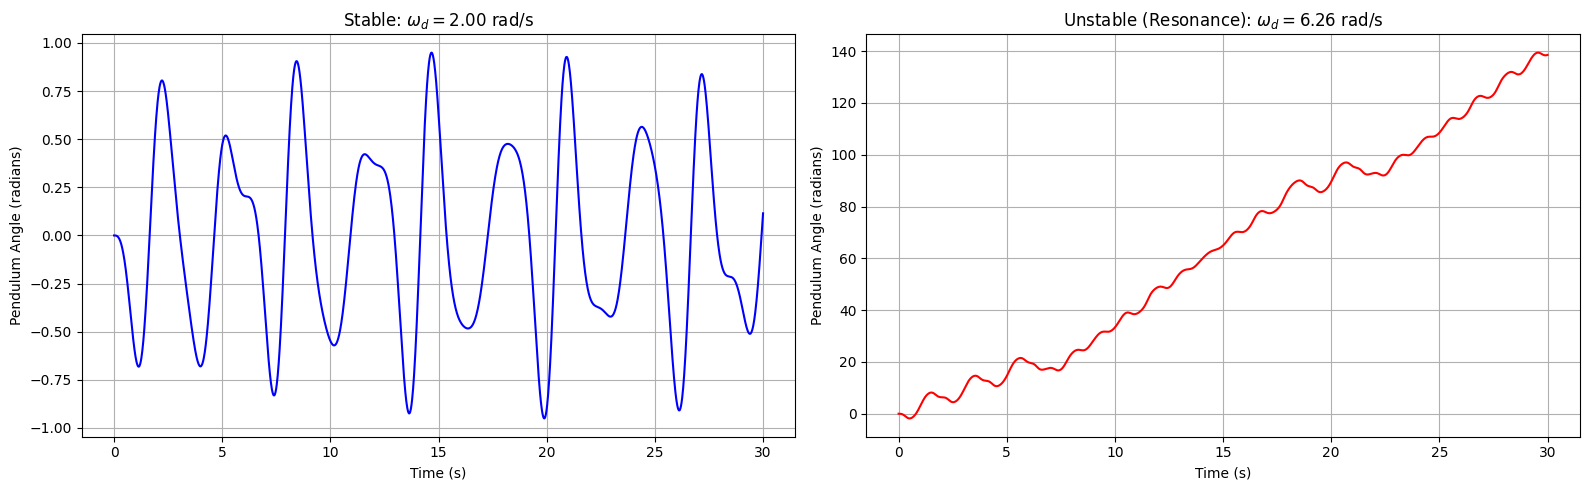

--- Generating Animation for STABLE Case (ω_d = 2.000) ---


--- Generating Animation for UNSTABLE Case (ω_d = 6.264) ---


In [49]:
# --- 1. Plot side-by-side comparison ---
print("--- Comparing Stable vs. Unstable Motion ---")
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 5)) # 1 row, 2 columns

# Plot 1: Stable
ax1.plot(t_plot, theta_stable, 'b-')
ax1.set_title(rf'Stable: $\omega_d = {omega_stable:.2f}$ rad/s')
ax1.set_xlabel('Time (s)')
ax1.set_ylabel('Pendulum Angle (radians)')
ax1.grid(True)

# Plot 2: Unstable
ax2.plot(t_plot, theta_unstable, 'r-')
ax2.set_title(rf'Unstable (Resonance): $\omega_d = {omega_unstable:.2f}$ rad/s')
ax2.set_xlabel('Time (s)')
ax2.set_ylabel('Pendulum Angle (radians)')
ax2.grid(True)

plt.tight_layout()
plt.show()

# --- 2. Animate the STABLE motion ---
print(f"--- Generating Animation for STABLE Case (ω_d = {omega_stable:.3f}) ---")
x_pivot_s, y_pivot_s = get_pivot_xy(t_plot, l, omega_stable)
x_pendulum_s, y_pendulum_s = get_pendulum_xy(theta_stable, l)
x_lab_s, y_lab_s = get_lab_xy(x_pivot_s, y_pivot_s, x_pendulum_s, y_pendulum_s)

anim_stable = create_pendulum_animation(
    t_plot, x_pivot_s, y_pivot_s,
    x_lab_s, y_lab_s, l=l,
    show_traj=True,
    speed_factor=2
)
display(HTML(anim_stable.to_html5_video()))

# --- 3. Animate the UNSTABLE motion ---
print(f"--- Generating Animation for UNSTABLE Case (ω_d = {omega_unstable:.3f}) ---")
x_pivot_u, y_pivot_u = get_pivot_xy(t_plot, l, omega_unstable)
x_pendulum_u, y_pendulum_u = get_pendulum_xy(theta_unstable, l)
x_lab_u, y_lab_u = get_lab_xy(x_pivot_u, y_pivot_u, x_pendulum_u, y_pendulum_u)

anim_unstable = create_pendulum_animation(
    t_plot, x_pivot_u, y_pivot_u,
    x_lab_u, y_lab_u, l=l,
    show_traj=True,
    speed_factor=2
)
display(HTML(anim_unstable.to_html5_video()))

# 6. *_Conclusion_*

## Conclusion & Analysis

This simulation successfully demonstrates the stability of the pivot-driven pendulum.

**1. Analytic Prediction:**
As derived in our "Physics Derivation" and "Stability Analysis" text cells, the linearized equation of motion predicts **parametric resonance** when the driving frequency $\omega_d$ is approximately twice the natural frequency $\omega_0$.

  * Our natural frequency is $\omega_0 = \sqrt{g/l} \approx 3.13$ rad/s.
  
  * Our predicted unstable frequency is $\omega_d \approx 2\omega_0 \approx 6.26$ rad/s.

**2. Computational Results:**
Our simulation results from Cell 5 strongly support this prediction:

  * **For the stable case ($\omega_d = 2.0$ rad/s):** The "Angle vs. Time" plot clearly shows that the pendulum's angle $\theta$ remains "nearly stationary," oscillating in a small, stable range. The animation confirms this, showing the bob just wiggling slightly as the pivot moves.

  * **For the unstable case ($\omega_d = 6.26$ rad/s):** The plot shows the angle $\theta$ growing exponentially, quickly reaching thousands of radians. This confirms that the $\theta=0$ equilibrium is unstable at this frequency. The animation supports this by showing the bob's motion growing into the "more circular," full-swing loops, which is characteristic of parametric resonance.

**Final Answer:**
The pendulum's equilibrium at $\theta=0$ is **stable** for many driving frequencies (like $\omega_d = 2.0$), but it becomes **unstable** when the driving frequency is at or near twice its natural frequency ($\omega_d \approx 6.26$ rad/s), as predicted by our analysis.